Equipo:



*   Martha Juarez 
*   Adilene Calderón
*   Paola Velez
*   Benjamin Lopez
*   Carlos Velázquez
*   Ibsan Morales
*   Manuel Valenzuela
*   Samuel Cortez

## EVI Dentro Sin Atipicos EDA

### Importación de librerias necesarias

In [48]:
#Descomprimimos los Datos
!unzip evi_dentro_sa.zip

Archive:  evi_dentro_sa.zip
   creating: evi_dentro_sa/
  inflating: evi_dentro_sa/ENCINAR-ST_EVI_D.csv  
  inflating: evi_dentro_sa/MATSUB-ST_EVI_D.csv  
  inflating: evi_dentro_sa/MATXERO-ST_EVI_D.csv  
  inflating: evi_dentro_sa/MEZQUITAL-ST_EVI_D.csv  
  inflating: evi_dentro_sa/PASTINDU-ST_EVI_D.csv  
  inflating: evi_dentro_sa/PASTIZAL-ST_EVI_D.csv  
  inflating: evi_dentro_sa/VEGARRO-ST_EVI_D.csv  


In [49]:
# Librerías para el tratamiento y operación de los datos
import numpy as np
import pandas as pd
import math
# Librerías de visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
# Librería para el análisis de los datos nulos
import missingno as msno
# Librería con funciones del sistema operativo
import os

### Lectura de Archivos

In [50]:
# Se obtienen todos los csv
main_path = '/content/evi_dentro_sa'
files = os.listdir(main_path)

In [51]:
files

['PASTIZAL-ST_EVI_D.csv',
 'MATSUB-ST_EVI_D.csv',
 'ENCINAR-ST_EVI_D.csv',
 'VEGARRO-ST_EVI_D.csv',
 'MEZQUITAL-ST_EVI_D.csv',
 'PASTINDU-ST_EVI_D.csv',
 'MATXERO-ST_EVI_D.csv']

In [52]:
#Renombrando archivos
for i in files:
  os.rename(main_path + '/' + i, main_path + '/' + i.replace('-ST_EVI_D',"") )
files = os.listdir(main_path)

In [53]:
file_path = os.path.join(main_path, files[0])
data_0 = pd.read_csv(file_path, index_col=0, encoding= 'utf-8')
data_0.head()

,X18.feb.,X5.mar.,X21.mar.,X6.abr.,X22.abr.,X8.may.,X24.may.,X9.jun.,X25.jun.,X11.jul.,X27.jul.,X12.ago.,X28.ago.,X13.sep.,X29.sep.,X15.oct.,X31.oct.,X16.nov.,X2.dic.,X18.dic.,X1.ene.,X16.ene.,X2.feb.,X18.feb..1,X6.mar.,X22.mar.,X7.abr.,X23.abr.,X9.may.,X25.may.,X10.jun.,X26.jun.,X12.jul.,X28.jul.,X13.ago.,X29.ago.,X14.sep.,X30.sep.,X16.oct.,X1.nov.,...,X23.abr..14,X9.may..14,X25.may..14,X10.jun..14,X26.jun..14,X12.jul..14,X28.jul..14,X13.ago..14,X29.ago..14,X14.sep..14,X30.sep..14,X16.oct..14,X1.nov..14,X17.nov..14,X3.dic..14,X19.dic..14,X1.ene..19,X17.ene..4,X2.feb..19,X18.feb..20,X5.mar..5,X21.mar..5,X6.abr..5,X22.abr..5,X8.may..5,X24.may..5,X9.jun..5,X25.jun..5,X11.jul..5,X27.jul..5,X12.ago..5,X28.ago..5,X13.sep..5,X29.sep..5,X15.oct..5,X31.oct..5,X16.nov..5,X2.dic..5,X18.dic..5,X01.ene.
1.0,1161.0,1111.0,1209.0,1172.0,1184.0,1217.0,1201.0,1096.0,3479.0,4449.0,3458.0,3148.0,2557.0,2380.0,1992.0,1668.0,2186.0,2524.0,2302.0,1894.0,1699.0,1765.0,1832.0,1513.0,1663.0,1471.0,1371.0,1385.0,1234.0,1275.0,1341.0,3284.0,3899.0,4112.0,3346.0,3184.0,2727.0,2599.0,1883.0,1649.0,...,1375.0,1360.0,1179.0,1335.0,1326.0,3119.0,4219.0,4903.0,4702.0,3891.0,3168.0,2562.0,2265.0,2397.0,2082.0,1934.0,2116.0,1757.0,1643.0,2035.0,2228.0,2360.0,2376.0,1971.0,1682.0,1556.0,1674.0,1634.0,2158.0,2923.0,2997.0,3915.0,3123.0,2242.0,1986.0,1708.0,1634.0,1587.0,1625.0,1625.0
2.0,1294.0,1125.0,1283.0,1256.0,1232.0,1326.0,1334.0,1419.0,4737.0,4869.0,3981.0,3559.0,2727.0,2436.0,2014.0,1965.0,2196.0,2543.0,2306.0,1630.0,1987.0,1851.0,1806.0,1645.0,1738.0,1481.0,1373.0,1399.0,1262.0,1334.0,1422.0,3943.0,4971.0,5475.0,4304.0,4275.0,3084.0,2870.0,2067.0,1852.0,...,1478.0,1366.0,1147.0,1210.0,1300.0,3587.0,5818.0,5466.0,5089.0,4323.0,3427.0,2813.0,2601.0,2595.0,2396.0,2012.0,2081.0,1895.0,1768.0,2028.0,1909.0,2613.0,2464.0,2063.0,1702.0,1487.0,1552.0,1684.0,1998.0,4136.0,4265.0,4734.0,3514.0,2290.0,1881.0,1739.0,1435.0,1576.0,1734.0,1396.0
3.0,1599.0,1536.0,1622.0,1596.0,1512.0,1400.0,1690.0,1803.0,3870.0,4542.0,3941.0,3997.0,2991.0,2224.0,2099.0,2023.0,2480.0,2605.0,2539.0,2450.0,2303.0,2194.0,2171.0,2062.0,2105.0,1997.0,1746.0,1813.0,1608.0,1661.0,1303.0,3506.0,4668.0,4302.0,4107.0,4233.0,2887.0,2933.0,2490.0,2232.0,...,1352.0,1704.0,1623.0,1731.0,1534.0,1826.0,3872.0,2933.0,3508.0,3749.0,3414.0,2713.0,2687.0,2919.0,2644.0,2874.0,2899.0,2661.0,2449.0,2571.0,2522.0,2824.0,2493.0,2235.0,2137.0,1858.0,2145.0,2852.0,3321.0,3966.0,3780.0,4267.0,3423.0,2680.0,2496.0,2150.0,2054.0,2147.0,2239.0,2164.0
4.0,1439.0,1605.0,1526.0,1419.0,1498.0,1531.0,1602.0,1697.0,3770.0,4245.0,3860.0,3902.0,2935.0,2566.0,2098.0,1963.0,2051.0,2354.0,2125.0,1994.0,2112.0,1873.0,2169.0,2104.0,2233.0,1983.0,1780.0,1800.0,1636.0,1611.0,1784.0,3022.0,3884.0,3676.0,3844.0,3611.0,2599.0,2688.0,2408.0,2065.0,...,1638.0,2034.0,1934.0,2028.0,1596.0,3589.0,4145.0,4180.0,3827.0,4661.0,3185.0,2850.0,2176.0,2738.0,2495.0,2369.0,2491.0,2222.0,2039.0,2579.0,2643.0,2961.0,2550.0,2596.0,1930.0,1815.0,1789.0,2711.0,3101.0,3805.0,3879.0,3984.0,3146.0,2441.0,2117.0,1987.0,1916.0,1767.0,1998.0,1736.0
5.0,1215.0,1184.0,1233.0,1240.0,1149.0,1165.0,1201.0,1165.0,2542.0,2551.0,2602.0,2508.0,2040.0,1871.0,1640.0,1652.0,1793.0,1863.0,1906.0,2087.0,1722.0,1592.0,1580.0,1549.0,1687.0,1704.0,1559.0,1567.0,1500.0,1357.0,1462.0,1943.0,2491.0,3041.0,2612.0,2211.0,2078.0,2252.0,2039.0,1838.0,...,1672.0,1726.0,1457.0,1565.0,1404.0,2662.0,2618.0,2685.0,3003.0,2617.0,2615.0,2576.0,2248.0,2366.0,2159.0,1818.0,1963.0,1564.0,1659.0,1747.0,1941.0,2616.0,2273.0,2177.0,2743.0,1744.0,2197.0,2508.0,2221.0,3227.0,2940.0,2832.0,2744.0,2316.0,2230.0,1825.0,1845.0,1783.0,1676.0,1611.0


In [54]:
# Se ejecutan en un ciclo for la importación de los datos
data_df = pd.DataFrame()
file_list = []
shape_list = []

for file in files:
    if file.find('csv') != -1:
        file_list.append(file)
        file_data = os.path.join(main_path, file)
        df_new = pd.read_csv(file_data,
                            sep = ',',
                            index_col= 0,
                            encoding= 'utf-8')
        
        df_new['CAT'] = len(df_new)*[file.strip('.csv')]
        df_new = df_new.iloc[:-2].copy()
        data_df = pd.concat([data_df, df_new], axis = 0)



In [55]:
data_df.head()

,X18.feb.,X5.mar.,X21.mar.,X6.abr.,X22.abr.,X8.may.,X24.may.,X9.jun.,X25.jun.,X11.jul.,X27.jul.,X12.ago.,X28.ago.,X13.sep.,X29.sep.,X15.oct.,X31.oct.,X16.nov.,X2.dic.,X18.dic.,X1.ene.,X16.ene.,X2.feb.,X18.feb..1,X6.mar.,X22.mar.,X7.abr.,X23.abr.,X9.may.,X25.may.,X10.jun.,X26.jun.,X12.jul.,X28.jul.,X13.ago.,X29.ago.,X14.sep.,X30.sep.,X16.oct.,X1.nov.,...,X9.may..14,X25.may..14,X10.jun..14,X26.jun..14,X12.jul..14,X28.jul..14,X13.ago..14,X29.ago..14,X14.sep..14,X30.sep..14,X16.oct..14,X1.nov..14,X17.nov..14,X3.dic..14,X19.dic..14,X1.ene..19,X17.ene..4,X2.feb..19,X18.feb..20,X5.mar..5,X21.mar..5,X6.abr..5,X22.abr..5,X8.may..5,X24.may..5,X9.jun..5,X25.jun..5,X11.jul..5,X27.jul..5,X12.ago..5,X28.ago..5,X13.sep..5,X29.sep..5,X15.oct..5,X31.oct..5,X16.nov..5,X2.dic..5,X18.dic..5,X01.ene.,CAT
1.0,1161.0,1111.0,1209.0,1172.0,1184.0,1217.0,1201.0,1096.0,3479.0,4449.0,3458.0,3148.0,2557.0,2380.0,1992.0,1668.0,2186.0,2524.0,2302.0,1894.0,1699.0,1765.0,1832.0,1513.0,1663.0,1471.0,1371.0,1385.0,1234.0,1275.0,1341.0,3284.0,3899.0,4112.0,3346.0,3184.0,2727.0,2599.0,1883.0,1649.0,...,1360.0,1179.0,1335.0,1326.0,3119.0,4219.0,4903.0,4702.0,3891.0,3168.0,2562.0,2265.0,2397.0,2082.0,1934.0,2116.0,1757.0,1643.0,2035.0,2228.0,2360.0,2376.0,1971.0,1682.0,1556.0,1674.0,1634.0,2158.0,2923.0,2997.0,3915.0,3123.0,2242.0,1986.0,1708.0,1634.0,1587.0,1625.0,1625.0,VEGARRO
2.0,1294.0,1125.0,1283.0,1256.0,1232.0,1326.0,1334.0,1419.0,4737.0,4869.0,3981.0,3559.0,2727.0,2436.0,2014.0,1965.0,2196.0,2543.0,2306.0,1630.0,1987.0,1851.0,1806.0,1645.0,1738.0,1481.0,1373.0,1399.0,1262.0,1334.0,1422.0,3943.0,4971.0,5475.0,4304.0,4275.0,3084.0,2870.0,2067.0,1852.0,...,1366.0,1147.0,1210.0,1300.0,3587.0,5818.0,5466.0,5089.0,4323.0,3427.0,2813.0,2601.0,2595.0,2396.0,2012.0,2081.0,1895.0,1768.0,2028.0,1909.0,2613.0,2464.0,2063.0,1702.0,1487.0,1552.0,1684.0,1998.0,4136.0,4265.0,4734.0,3514.0,2290.0,1881.0,1739.0,1435.0,1576.0,1734.0,1396.0,VEGARRO
3.0,1599.0,1536.0,1622.0,1596.0,1512.0,1400.0,1690.0,1803.0,3870.0,4542.0,3941.0,3997.0,2991.0,2224.0,2099.0,2023.0,2480.0,2605.0,2539.0,2450.0,2303.0,2194.0,2171.0,2062.0,2105.0,1997.0,1746.0,1813.0,1608.0,1661.0,1303.0,3506.0,4668.0,4302.0,4107.0,4233.0,2887.0,2933.0,2490.0,2232.0,...,1704.0,1623.0,1731.0,1534.0,1826.0,3872.0,2933.0,3508.0,3749.0,3414.0,2713.0,2687.0,2919.0,2644.0,2874.0,2899.0,2661.0,2449.0,2571.0,2522.0,2824.0,2493.0,2235.0,2137.0,1858.0,2145.0,2852.0,3321.0,3966.0,3780.0,4267.0,3423.0,2680.0,2496.0,2150.0,2054.0,2147.0,2239.0,2164.0,VEGARRO
4.0,1439.0,1605.0,1526.0,1419.0,1498.0,1531.0,1602.0,1697.0,3770.0,4245.0,3860.0,3902.0,2935.0,2566.0,2098.0,1963.0,2051.0,2354.0,2125.0,1994.0,2112.0,1873.0,2169.0,2104.0,2233.0,1983.0,1780.0,1800.0,1636.0,1611.0,1784.0,3022.0,3884.0,3676.0,3844.0,3611.0,2599.0,2688.0,2408.0,2065.0,...,2034.0,1934.0,2028.0,1596.0,3589.0,4145.0,4180.0,3827.0,4661.0,3185.0,2850.0,2176.0,2738.0,2495.0,2369.0,2491.0,2222.0,2039.0,2579.0,2643.0,2961.0,2550.0,2596.0,1930.0,1815.0,1789.0,2711.0,3101.0,3805.0,3879.0,3984.0,3146.0,2441.0,2117.0,1987.0,1916.0,1767.0,1998.0,1736.0,VEGARRO
5.0,1215.0,1184.0,1233.0,1240.0,1149.0,1165.0,1201.0,1165.0,2542.0,2551.0,2602.0,2508.0,2040.0,1871.0,1640.0,1652.0,1793.0,1863.0,1906.0,2087.0,1722.0,1592.0,1580.0,1549.0,1687.0,1704.0,1559.0,1567.0,1500.0,1357.0,1462.0,1943.0,2491.0,3041.0,2612.0,2211.0,2078.0,2252.0,2039.0,1838.0,...,1726.0,1457.0,1565.0,1404.0,2662.0,2618.0,2685.0,3003.0,2617.0,2615.0,2576.0,2248.0,2366.0,2159.0,1818.0,1963.0,1564.0,1659.0,1747.0,1941.0,2616.0,2273.0,2177.0,2743.0,1744.0,2197.0,2508.0,2221.0,3227.0,2940.0,2832.0,2744.0,2316.0,2230.0,1825.0,1845.0,1783.0,1676.0,1611.0,VEGARRO


In [56]:
data_df.tail()

,X18.feb.,X5.mar.,X21.mar.,X6.abr.,X22.abr.,X8.may.,X24.may.,X9.jun.,X25.jun.,X11.jul.,X27.jul.,X12.ago.,X28.ago.,X13.sep.,X29.sep.,X15.oct.,X31.oct.,X16.nov.,X2.dic.,X18.dic.,X1.ene.,X16.ene.,X2.feb.,X18.feb..1,X6.mar.,X22.mar.,X7.abr.,X23.abr.,X9.may.,X25.may.,X10.jun.,X26.jun.,X12.jul.,X28.jul.,X13.ago.,X29.ago.,X14.sep.,X30.sep.,X16.oct.,X1.nov.,...,X9.may..14,X25.may..14,X10.jun..14,X26.jun..14,X12.jul..14,X28.jul..14,X13.ago..14,X29.ago..14,X14.sep..14,X30.sep..14,X16.oct..14,X1.nov..14,X17.nov..14,X3.dic..14,X19.dic..14,X1.ene..19,X17.ene..4,X2.feb..19,X18.feb..20,X5.mar..5,X21.mar..5,X6.abr..5,X22.abr..5,X8.may..5,X24.may..5,X9.jun..5,X25.jun..5,X11.jul..5,X27.jul..5,X12.ago..5,X28.ago..5,X13.sep..5,X29.sep..5,X15.oct..5,X31.oct..5,X16.nov..5,X2.dic..5,X18.dic..5,X01.ene.,CAT
21.0,1582.0,1385.0,1441.0,1521.0,1435.0,1415.0,1516.0,3743.0,5741.0,4535.0,4236.0,4268.0,3549.0,2299.0,2013.0,1836.0,2330.0,2746.0,2781.0,2515.0,2426.0,2121.0,2057.0,1965.0,2002.0,1880.0,1735.0,1524.0,1622.0,1636.0,1555.0,4470.0,3945.0,5130.0,3902.0,2848.0,2175.0,2499.0,2157.0,1801.0,...,1883.0,1625.0,1894.0,2404.0,4358.0,4931.0,4942.0,3916.0,4437.0,4319.0,3388.0,2611.0,2561.0,2517.0,2288.0,2328.0,1935.0,1701.0,1650.0,1816.0,2187.0,2199.0,2400.0,2027.0,2287.0,2459.0,4043.0,3842.0,3043.0,2942.0,3382.0,2380.0,1935.0,1836.0,1753.0,1741.0,1635.0,1838.0,1685.0,PASTINDU
22.0,1387.0,1307.0,1361.0,1366.0,1344.0,1412.0,1531.0,3205.0,5546.0,4140.0,4524.0,4137.0,3264.0,2466.0,1985.0,1778.0,2397.0,2641.0,2754.0,2486.0,2201.0,2000.0,1865.0,1892.0,1900.0,1687.0,1564.0,1482.0,1510.0,1478.0,1488.0,3894.0,3590.0,5139.0,3777.0,2566.0,2069.0,2364.0,2020.0,1798.0,...,1626.0,1455.0,1392.0,2061.0,4570.0,4425.0,5353.0,4135.0,4278.0,3984.0,3227.0,2316.0,2220.0,2296.0,2174.0,2034.0,1664.0,1475.0,1681.0,1932.0,2026.0,2240.0,2089.0,1905.0,1892.0,2291.0,3473.0,3073.0,2491.0,2809.0,2773.0,2105.0,1763.0,1672.0,1550.0,1765.0,1561.0,1701.0,1701.0,PASTINDU
23.0,1301.0,1355.0,1419.0,1335.0,1277.0,1397.0,1497.0,2910.0,5086.0,4203.0,4571.0,4030.0,3316.0,2570.0,1939.0,1862.0,2465.0,2623.0,2322.0,2165.0,2044.0,1860.0,1792.0,1681.0,1668.0,1613.0,1695.0,1542.0,1541.0,1567.0,1436.0,3382.0,3102.0,4754.0,3526.0,2578.0,2004.0,2255.0,1949.0,1761.0,...,1835.0,1439.0,1762.0,2146.0,3573.0,3881.0,4663.0,3166.0,3880.0,3313.0,3156.0,2310.0,2101.0,2102.0,2022.0,2032.0,1775.0,1440.0,1630.0,1828.0,2150.0,2691.0,2288.0,2270.0,2085.0,2404.0,3192.0,3316.0,2785.0,2618.0,2665.0,2177.0,1886.0,1611.0,1601.0,1874.0,1473.0,1632.0,1505.0,PASTINDU
24.0,1396.0,1339.0,1417.0,1375.0,1383.0,1459.0,1475.0,3178.0,5158.0,4121.0,3907.0,3710.0,2925.0,2137.0,1859.0,1725.0,2121.0,2633.0,2667.0,2528.0,2138.0,2313.0,2107.0,1946.0,1913.0,1648.0,1532.0,1453.0,1523.0,1482.0,1530.0,3660.0,3854.0,4618.0,3509.0,2349.0,2103.0,2325.0,1939.0,1854.0,...,1696.0,1469.0,1312.0,2049.0,2458.0,4459.0,4692.0,3738.0,4132.0,4034.0,3032.0,2320.0,2267.0,2239.0,2198.0,2421.0,2294.0,1650.0,1893.0,1809.0,2208.0,2208.0,1987.0,1882.0,1736.0,2271.0,3431.0,3222.0,2701.0,2718.0,3028.0,2201.0,1780.0,1640.0,1659.0,1739.0,1564.0,1723.0,1723.0,PASTINDU
25.0,1359.0,1353.0,1388.0,1343.0,1406.0,1370.0,1395.0,3125.0,5421.0,3911.0,4349.0,3632.0,3225.0,2196.0,1829.0,1625.0,2330.0,2234.0,2461.0,2442.0,2123.0,1753.0,2055.0,1895.0,1901.0,1685.0,1535.0,1462.0,1548.0,1474.0,1465.0,3721.0,3514.0,4634.0,3455.0,2549.0,1959.0,2267.0,1908.0,1804.0,...,1656.0,1504.0,1352.0,2017.0,4033.0,4404.0,4459.0,3446.0,4323.0,3987.0,3201.0,2505.0,2350.0,2265.0,2394.0,2202.0,2294.0,1650.0,1893.0,1809.0,2208.0,2208.0,1987.0,1882.0,1736.0,2271.0,3431.0,3222.0,2701.0,2718.0,3028.0,2201.0,1780.0,1640.0,1659.0,1739.0,1564.0,1723.0,1723.0,PASTINDU


### Informacion del DataFrame

In [57]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 210 entries, 1.0 to 25.0
Columns: 482 entries, X18.feb. to CAT
dtypes: float64(481), object(1)
memory usage: 792.4+ KB


In [58]:
### Verificando que no hay columnas con nombres duplicados
(data_df.columns.value_counts(ascending= True) == 1).all()

True

In [59]:
#Observando nombres de clases
CAT = data_df['CAT'].unique().tolist()
CAT

['VEGARRO',
 'ENCINAR',
 'MATSUB',
 'MATXERO',
 'MEZQUITAL',
 'PASTIZAL',
 'PASTINDU']

### Verificando valores nulos

In [60]:
data_null = data_df.isnull().sum(axis = 0).sort_values(ascending = True)

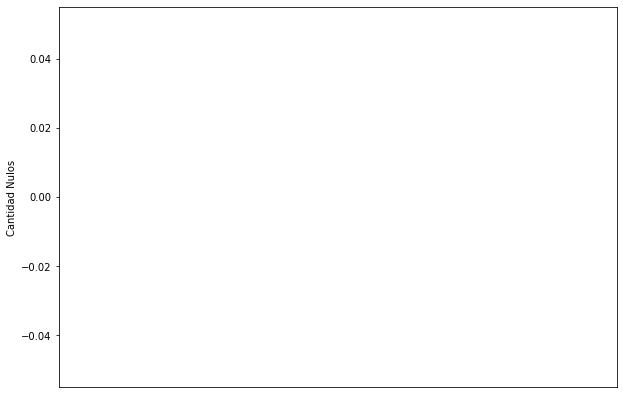

In [62]:
#Observamos que no hay valores nulos
fig_null, ax_null = plt.subplots(nrows=1, ncols = 1, figsize = (10,7))
data_null.plot(kind = 'bar', 
               ax = ax_null)
ax_null.xaxis.set_visible(False)
ax_null.set_ylabel('Cantidad Nulos')
plt.show()

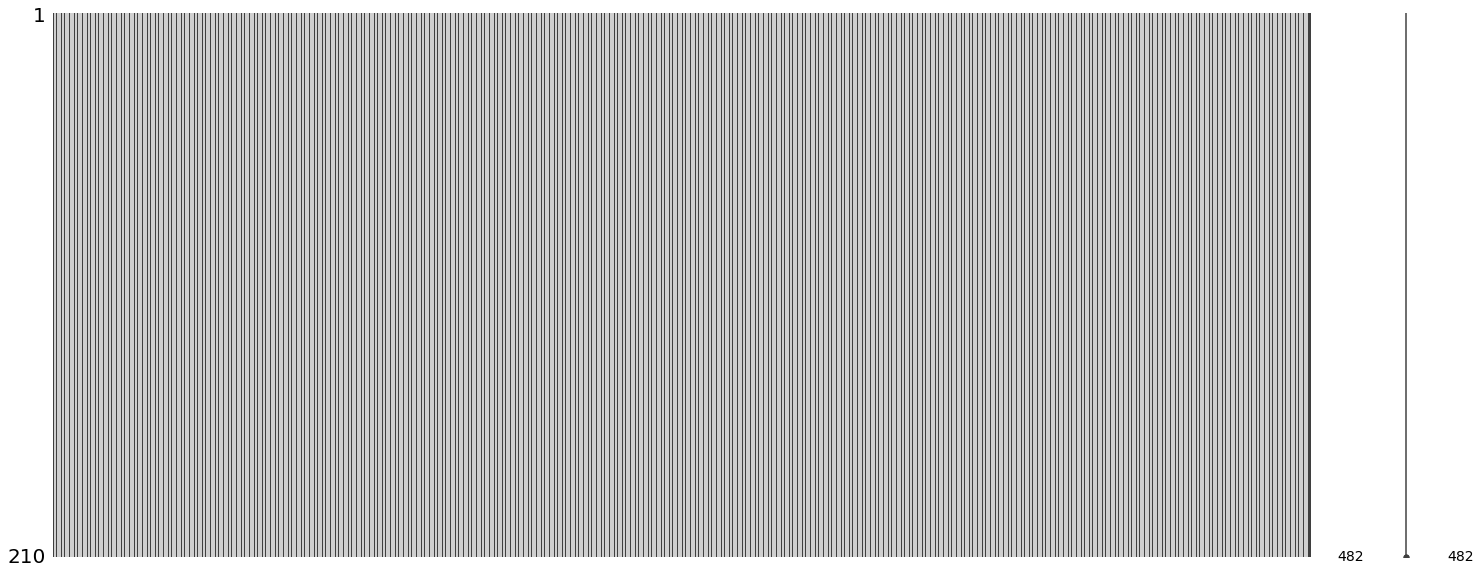

In [65]:
msno.matrix(data_df)

### Limpieza de Datos


In [67]:
#Observamos que las columnas tienen X antes de la fecha
data_df.head(2)

,X18.feb.,X5.mar.,X21.mar.,X6.abr.,X22.abr.,X8.may.,X24.may.,X9.jun.,X25.jun.,X11.jul.,X27.jul.,X12.ago.,X28.ago.,X13.sep.,X29.sep.,X15.oct.,X31.oct.,X16.nov.,X2.dic.,X18.dic.,X1.ene.,X16.ene.,X2.feb.,X18.feb..1,X6.mar.,X22.mar.,X7.abr.,X23.abr.,X9.may.,X25.may.,X10.jun.,X26.jun.,X12.jul.,X28.jul.,X13.ago.,X29.ago.,X14.sep.,X30.sep.,X16.oct.,X1.nov.,...,X9.may..14,X25.may..14,X10.jun..14,X26.jun..14,X12.jul..14,X28.jul..14,X13.ago..14,X29.ago..14,X14.sep..14,X30.sep..14,X16.oct..14,X1.nov..14,X17.nov..14,X3.dic..14,X19.dic..14,X1.ene..19,X17.ene..4,X2.feb..19,X18.feb..20,X5.mar..5,X21.mar..5,X6.abr..5,X22.abr..5,X8.may..5,X24.may..5,X9.jun..5,X25.jun..5,X11.jul..5,X27.jul..5,X12.ago..5,X28.ago..5,X13.sep..5,X29.sep..5,X15.oct..5,X31.oct..5,X16.nov..5,X2.dic..5,X18.dic..5,X01.ene.,CAT
1.0,1161.0,1111.0,1209.0,1172.0,1184.0,1217.0,1201.0,1096.0,3479.0,4449.0,3458.0,3148.0,2557.0,2380.0,1992.0,1668.0,2186.0,2524.0,2302.0,1894.0,1699.0,1765.0,1832.0,1513.0,1663.0,1471.0,1371.0,1385.0,1234.0,1275.0,1341.0,3284.0,3899.0,4112.0,3346.0,3184.0,2727.0,2599.0,1883.0,1649.0,...,1360.0,1179.0,1335.0,1326.0,3119.0,4219.0,4903.0,4702.0,3891.0,3168.0,2562.0,2265.0,2397.0,2082.0,1934.0,2116.0,1757.0,1643.0,2035.0,2228.0,2360.0,2376.0,1971.0,1682.0,1556.0,1674.0,1634.0,2158.0,2923.0,2997.0,3915.0,3123.0,2242.0,1986.0,1708.0,1634.0,1587.0,1625.0,1625.0,VEGARRO
2.0,1294.0,1125.0,1283.0,1256.0,1232.0,1326.0,1334.0,1419.0,4737.0,4869.0,3981.0,3559.0,2727.0,2436.0,2014.0,1965.0,2196.0,2543.0,2306.0,1630.0,1987.0,1851.0,1806.0,1645.0,1738.0,1481.0,1373.0,1399.0,1262.0,1334.0,1422.0,3943.0,4971.0,5475.0,4304.0,4275.0,3084.0,2870.0,2067.0,1852.0,...,1366.0,1147.0,1210.0,1300.0,3587.0,5818.0,5466.0,5089.0,4323.0,3427.0,2813.0,2601.0,2595.0,2396.0,2012.0,2081.0,1895.0,1768.0,2028.0,1909.0,2613.0,2464.0,2063.0,1702.0,1487.0,1552.0,1684.0,1998.0,4136.0,4265.0,4734.0,3514.0,2290.0,1881.0,1739.0,1435.0,1576.0,1734.0,1396.0,VEGARRO


In [68]:
#Removemos la X
for i in data_df.columns:
  nuevo_nombre = i.replace("X", "")
  data_df.rename(columns={i: nuevo_nombre}, inplace=True)

In [73]:
#Reemplazamos el primer . por un -
for i in data_df.columns:
  nuevo_nombre = i.replace(".", "-",1)
  data_df.rename(columns={i: nuevo_nombre}, inplace=True)

In [74]:
data_df.head(2)

,18-feb.,5-mar.,21-mar.,6-abr.,22-abr.,8-may.,24-may.,9-jun.,25-jun.,11-jul.,27-jul.,12-ago.,28-ago.,13-sep.,29-sep.,15-oct.,31-oct.,16-nov.,2-dic.,18-dic.,1-ene.,16-ene.,2-feb.,18-feb..1,6-mar.,22-mar.,7-abr.,23-abr.,9-may.,25-may.,10-jun.,26-jun.,12-jul.,28-jul.,13-ago.,29-ago.,14-sep.,30-sep.,16-oct.,1-nov.,...,9-may..14,25-may..14,10-jun..14,26-jun..14,12-jul..14,28-jul..14,13-ago..14,29-ago..14,14-sep..14,30-sep..14,16-oct..14,1-nov..14,17-nov..14,3-dic..14,19-dic..14,1-ene..19,17-ene..4,2-feb..19,18-feb..20,5-mar..5,21-mar..5,6-abr..5,22-abr..5,8-may..5,24-may..5,9-jun..5,25-jun..5,11-jul..5,27-jul..5,12-ago..5,28-ago..5,13-sep..5,29-sep..5,15-oct..5,31-oct..5,16-nov..5,2-dic..5,18-dic..5,01-ene.,CAT
1.0,1161.0,1111.0,1209.0,1172.0,1184.0,1217.0,1201.0,1096.0,3479.0,4449.0,3458.0,3148.0,2557.0,2380.0,1992.0,1668.0,2186.0,2524.0,2302.0,1894.0,1699.0,1765.0,1832.0,1513.0,1663.0,1471.0,1371.0,1385.0,1234.0,1275.0,1341.0,3284.0,3899.0,4112.0,3346.0,3184.0,2727.0,2599.0,1883.0,1649.0,...,1360.0,1179.0,1335.0,1326.0,3119.0,4219.0,4903.0,4702.0,3891.0,3168.0,2562.0,2265.0,2397.0,2082.0,1934.0,2116.0,1757.0,1643.0,2035.0,2228.0,2360.0,2376.0,1971.0,1682.0,1556.0,1674.0,1634.0,2158.0,2923.0,2997.0,3915.0,3123.0,2242.0,1986.0,1708.0,1634.0,1587.0,1625.0,1625.0,VEGARRO
2.0,1294.0,1125.0,1283.0,1256.0,1232.0,1326.0,1334.0,1419.0,4737.0,4869.0,3981.0,3559.0,2727.0,2436.0,2014.0,1965.0,2196.0,2543.0,2306.0,1630.0,1987.0,1851.0,1806.0,1645.0,1738.0,1481.0,1373.0,1399.0,1262.0,1334.0,1422.0,3943.0,4971.0,5475.0,4304.0,4275.0,3084.0,2870.0,2067.0,1852.0,...,1366.0,1147.0,1210.0,1300.0,3587.0,5818.0,5466.0,5089.0,4323.0,3427.0,2813.0,2601.0,2595.0,2396.0,2012.0,2081.0,1895.0,1768.0,2028.0,1909.0,2613.0,2464.0,2063.0,1702.0,1487.0,1552.0,1684.0,1998.0,4136.0,4265.0,4734.0,3514.0,2290.0,1881.0,1739.0,1435.0,1576.0,1734.0,1396.0,VEGARRO


In [75]:
#Seleccionamos todas las columnas menos la de CAT
list_fechas = data_df.columns[:-1].values.tolist()

In [76]:


#Diccionaro fechas
dict_fechas = {'ene':'01',
               'feb':'02',
               'mar':'03',
               'abr':'04',
               'may':'05',
               'jun':'06',
               'jul':'07',
               'ago':'08',
               'sep':'09',
               'oct':'10',
               'nov':'11',
               'dic':'12'}
# Formato fechas 
fecha_format = []
year = 2000
num_mes_ini = 1
for fecha in list_fechas:
    mes = fecha.split('.')[0].split('-')[1]
    num_mes = float(dict_fechas[mes].split('.')[0])
    if num_mes < num_mes_ini:
        year += 1
    
    fecha_format.append(fecha.replace(mes, dict_fechas[mes]).split('.')[0] + '-' + str(year))
    num_mes_ini = num_mes

date_time = pd.to_datetime(fecha_format, format = '%d-%m-%Y')

In [77]:
#Corroboramos las fechas obtenidas
date_time

DatetimeIndex(['2000-02-18', '2000-03-05', '2000-03-21', '2000-04-06',
               '2000-04-22', '2000-05-08', '2000-05-24', '2000-06-09',
               '2000-06-25', '2000-07-11',
               ...
               '2020-08-12', '2020-08-28', '2020-09-13', '2020-09-29',
               '2020-10-15', '2020-10-31', '2020-11-16', '2020-12-02',
               '2020-12-18', '2021-01-01'],
              dtype='datetime64[ns]', length=481, freq=None)

In [78]:
len(fecha_format), len(list_fechas)

(481, 481)

In [79]:
rename_col_fecha = dict(zip(list_fechas, fecha_format))

In [80]:
rename_col_fecha['01-ene.'], fecha_format[-1]

('01-01-2021', '01-01-2021')

In [81]:
data_df.rename(columns= rename_col_fecha, inplace = True)

In [82]:
#Verificamos que el DataFrame esté correcto
data_df.head()

,18-02-2000,5-03-2000,21-03-2000,6-04-2000,22-04-2000,8-05-2000,24-05-2000,9-06-2000,25-06-2000,11-07-2000,27-07-2000,12-08-2000,28-08-2000,13-09-2000,29-09-2000,15-10-2000,31-10-2000,16-11-2000,2-12-2000,18-12-2000,1-01-2001,16-01-2001,2-02-2001,18-02-2001,6-03-2001,22-03-2001,7-04-2001,23-04-2001,9-05-2001,25-05-2001,10-06-2001,26-06-2001,12-07-2001,28-07-2001,13-08-2001,29-08-2001,14-09-2001,30-09-2001,16-10-2001,1-11-2001,...,9-05-2019,25-05-2019,10-06-2019,26-06-2019,12-07-2019,28-07-2019,13-08-2019,29-08-2019,14-09-2019,30-09-2019,16-10-2019,1-11-2019,17-11-2019,3-12-2019,19-12-2019,1-01-2020,17-01-2020,2-02-2020,18-02-2020,5-03-2020,21-03-2020,6-04-2020,22-04-2020,8-05-2020,24-05-2020,9-06-2020,25-06-2020,11-07-2020,27-07-2020,12-08-2020,28-08-2020,13-09-2020,29-09-2020,15-10-2020,31-10-2020,16-11-2020,2-12-2020,18-12-2020,01-01-2021,CAT
1.0,1161.0,1111.0,1209.0,1172.0,1184.0,1217.0,1201.0,1096.0,3479.0,4449.0,3458.0,3148.0,2557.0,2380.0,1992.0,1668.0,2186.0,2524.0,2302.0,1894.0,1699.0,1765.0,1832.0,1513.0,1663.0,1471.0,1371.0,1385.0,1234.0,1275.0,1341.0,3284.0,3899.0,4112.0,3346.0,3184.0,2727.0,2599.0,1883.0,1649.0,...,1360.0,1179.0,1335.0,1326.0,3119.0,4219.0,4903.0,4702.0,3891.0,3168.0,2562.0,2265.0,2397.0,2082.0,1934.0,2116.0,1757.0,1643.0,2035.0,2228.0,2360.0,2376.0,1971.0,1682.0,1556.0,1674.0,1634.0,2158.0,2923.0,2997.0,3915.0,3123.0,2242.0,1986.0,1708.0,1634.0,1587.0,1625.0,1625.0,VEGARRO
2.0,1294.0,1125.0,1283.0,1256.0,1232.0,1326.0,1334.0,1419.0,4737.0,4869.0,3981.0,3559.0,2727.0,2436.0,2014.0,1965.0,2196.0,2543.0,2306.0,1630.0,1987.0,1851.0,1806.0,1645.0,1738.0,1481.0,1373.0,1399.0,1262.0,1334.0,1422.0,3943.0,4971.0,5475.0,4304.0,4275.0,3084.0,2870.0,2067.0,1852.0,...,1366.0,1147.0,1210.0,1300.0,3587.0,5818.0,5466.0,5089.0,4323.0,3427.0,2813.0,2601.0,2595.0,2396.0,2012.0,2081.0,1895.0,1768.0,2028.0,1909.0,2613.0,2464.0,2063.0,1702.0,1487.0,1552.0,1684.0,1998.0,4136.0,4265.0,4734.0,3514.0,2290.0,1881.0,1739.0,1435.0,1576.0,1734.0,1396.0,VEGARRO
3.0,1599.0,1536.0,1622.0,1596.0,1512.0,1400.0,1690.0,1803.0,3870.0,4542.0,3941.0,3997.0,2991.0,2224.0,2099.0,2023.0,2480.0,2605.0,2539.0,2450.0,2303.0,2194.0,2171.0,2062.0,2105.0,1997.0,1746.0,1813.0,1608.0,1661.0,1303.0,3506.0,4668.0,4302.0,4107.0,4233.0,2887.0,2933.0,2490.0,2232.0,...,1704.0,1623.0,1731.0,1534.0,1826.0,3872.0,2933.0,3508.0,3749.0,3414.0,2713.0,2687.0,2919.0,2644.0,2874.0,2899.0,2661.0,2449.0,2571.0,2522.0,2824.0,2493.0,2235.0,2137.0,1858.0,2145.0,2852.0,3321.0,3966.0,3780.0,4267.0,3423.0,2680.0,2496.0,2150.0,2054.0,2147.0,2239.0,2164.0,VEGARRO
4.0,1439.0,1605.0,1526.0,1419.0,1498.0,1531.0,1602.0,1697.0,3770.0,4245.0,3860.0,3902.0,2935.0,2566.0,2098.0,1963.0,2051.0,2354.0,2125.0,1994.0,2112.0,1873.0,2169.0,2104.0,2233.0,1983.0,1780.0,1800.0,1636.0,1611.0,1784.0,3022.0,3884.0,3676.0,3844.0,3611.0,2599.0,2688.0,2408.0,2065.0,...,2034.0,1934.0,2028.0,1596.0,3589.0,4145.0,4180.0,3827.0,4661.0,3185.0,2850.0,2176.0,2738.0,2495.0,2369.0,2491.0,2222.0,2039.0,2579.0,2643.0,2961.0,2550.0,2596.0,1930.0,1815.0,1789.0,2711.0,3101.0,3805.0,3879.0,3984.0,3146.0,2441.0,2117.0,1987.0,1916.0,1767.0,1998.0,1736.0,VEGARRO
5.0,1215.0,1184.0,1233.0,1240.0,1149.0,1165.0,1201.0,1165.0,2542.0,2551.0,2602.0,2508.0,2040.0,1871.0,1640.0,1652.0,1793.0,1863.0,1906.0,2087.0,1722.0,1592.0,1580.0,1549.0,1687.0,1704.0,1559.0,1567.0,1500.0,1357.0,1462.0,1943.0,2491.0,3041.0,2612.0,2211.0,2078.0,2252.0,2039.0,1838.0,...,1726.0,1457.0,1565.0,1404.0,2662.0,2618.0,2685.0,3003.0,2617.0,2615.0,2576.0,2248.0,2366.0,2159.0,1818.0,1963.0,1564.0,1659.0,1747.0,1941.0,2616.0,2273.0,2177.0,2743.0,1744.0,2197.0,2508.0,2221.0,3227.0,2940.0,2832.0,2744.0,2316.0,2230.0,1825.0,1845.0,1783.0,1676.0,1611.0,VEGARRO


### Agrupamientos por Clase

In [83]:
#Agrupamos por clase
data_group = data_df.groupby('CAT')

In [84]:
data_group.agg([np.median, np.std])

18-02-2000             5-03-2000  ...  18-12-2020 01-01-2021            
              median         std    median  ...         std     median         std
CAT                                         ...                                   
ENCINAR       1585.0  156.128321    1651.0  ...  300.287262     2142.0  276.363750
MATSUB        1137.0  131.388434    1056.0  ...  317.108807     1378.0  339.323338
MATXERO       1201.5   74.665175    1126.0  ...  208.375441     1616.5  188.781375
MEZQUITAL     1315.5  124.301917    1190.5  ...  300.798050     1956.5  239.512839
PASTINDU      1380.0  154.247442    1329.0  ...  109.375012     1701.0  124.744365
PASTIZAL      1467.0  109.120043    1525.0  ...  262.058303     1972.0  216.746276
VEGARRO       1396.0  222.156089    1440.0  ...  236.861762     1733.0  263.851535

[7 rows x 962 columns]

In [85]:
describe_data_group = data_group.agg([np.median, np.std]).T
describe_data_group.head()

CAT                    ENCINAR       MATSUB  ...     PASTIZAL      VEGARRO
18-02-2000 median  1585.000000  1137.000000  ...  1467.000000  1396.000000
           std      156.128321   131.388434  ...   109.120043   222.156089
5-03-2000  median  1651.000000  1056.000000  ...  1525.000000  1440.000000
           std      170.953388   106.550193  ...   215.586785   232.820623
21-03-2000 median  1735.000000  1230.500000  ...  1550.000000  1544.000000

[5 rows x 7 columns]

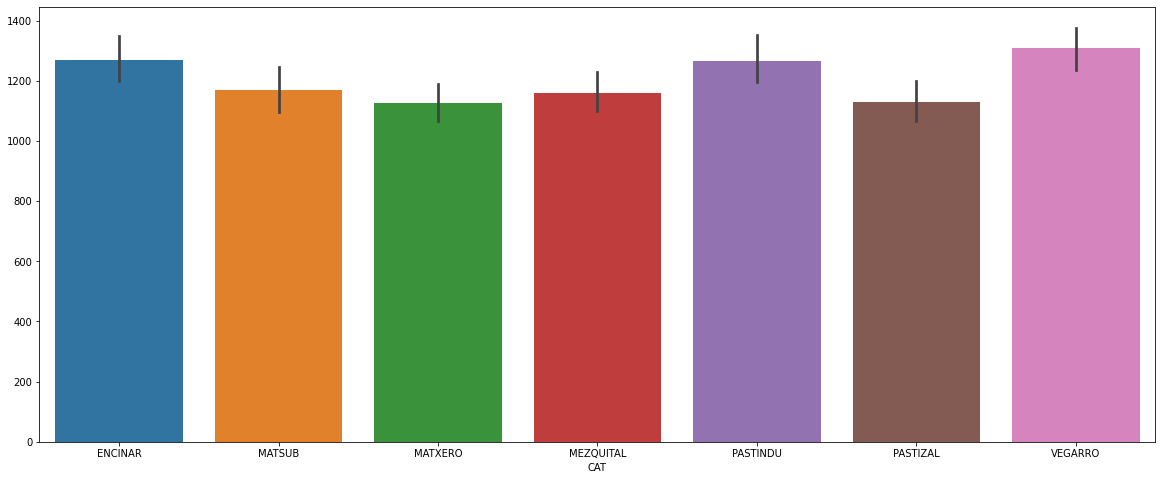

In [87]:
fig_group, ax_group = plt.subplots(nrows = 1, ncols = 1, figsize = (20,8))
sns.barplot(data = describe_data_group, ax = ax_group)
plt.show()

In [88]:
#Filtrando el grupo Encinar
ENCINAR_df = data_group.get_group('ENCINAR')
ENCINAR_df.head()


,18-02-2000,5-03-2000,21-03-2000,6-04-2000,22-04-2000,8-05-2000,24-05-2000,9-06-2000,25-06-2000,11-07-2000,27-07-2000,12-08-2000,28-08-2000,13-09-2000,29-09-2000,15-10-2000,31-10-2000,16-11-2000,2-12-2000,18-12-2000,1-01-2001,16-01-2001,2-02-2001,18-02-2001,6-03-2001,22-03-2001,7-04-2001,23-04-2001,9-05-2001,25-05-2001,10-06-2001,26-06-2001,12-07-2001,28-07-2001,13-08-2001,29-08-2001,14-09-2001,30-09-2001,16-10-2001,1-11-2001,...,9-05-2019,25-05-2019,10-06-2019,26-06-2019,12-07-2019,28-07-2019,13-08-2019,29-08-2019,14-09-2019,30-09-2019,16-10-2019,1-11-2019,17-11-2019,3-12-2019,19-12-2019,1-01-2020,17-01-2020,2-02-2020,18-02-2020,5-03-2020,21-03-2020,6-04-2020,22-04-2020,8-05-2020,24-05-2020,9-06-2020,25-06-2020,11-07-2020,27-07-2020,12-08-2020,28-08-2020,13-09-2020,29-09-2020,15-10-2020,31-10-2020,16-11-2020,2-12-2020,18-12-2020,01-01-2021,CAT
1.0,1715.0,1477.0,1731.0,1496.0,1516.0,1362.0,1508.0,1361.0,2250.0,3140.0,3034.0,2947.0,2308.0,2398.0,2171.0,2207.0,1858.0,2136.0,1969.0,1974.0,2033.0,1888.0,2109.0,1599.0,1944.0,2272.0,1759.0,1875.0,1425.0,1527.0,1717.0,2825.0,3713.0,3420.0,3712.0,3358.0,2842.0,2809.0,2364.0,2002.0,...,1859.0,1615.0,1571.0,1736.0,1458.0,2973.0,3134.0,4000.0,4064.0,3322.0,2954.0,2436.0,2876.0,2516.0,2165.0,2357.0,2224.0,1668.0,2038.0,2128.0,2053.0,1986.0,1752.0,1663.0,1516.0,1515.0,2427.0,1778.0,3462.0,3206.0,3255.0,2584.0,2155.0,1973.0,1978.0,2020.0,2000.0,1885.0,1819.0,ENCINAR
2.0,1547.0,1506.0,1654.0,1480.0,1484.0,1352.0,1453.0,1478.0,2715.0,3273.0,3239.0,2807.0,2309.0,2267.0,1832.0,1915.0,2015.0,2128.0,2061.0,2155.0,2005.0,1952.0,2084.0,2010.0,2179.0,1980.0,1912.0,1809.0,1518.0,1546.0,1685.0,2737.0,3670.0,4534.0,3512.0,3890.0,2912.0,2736.0,2305.0,2044.0,...,1824.0,1585.0,1534.0,1757.0,1522.0,3828.0,3726.0,4024.0,3804.0,3640.0,3146.0,2459.0,2955.0,2545.0,2358.0,2682.0,2527.0,2237.0,2427.0,2653.0,2893.0,2764.0,2646.0,2381.0,1964.0,2452.0,2262.0,2536.0,3287.0,3348.0,3454.0,3463.0,2749.0,2512.0,2409.0,2105.0,2188.0,1991.0,2036.0,ENCINAR
3.0,1543.0,1651.0,1749.0,1622.0,1506.0,1356.0,1518.0,1673.0,2790.0,3553.0,3347.0,3403.0,2553.0,2172.0,2076.0,1864.0,2079.0,2125.0,2069.0,1658.0,1783.0,1698.0,1920.0,1965.0,1954.0,2096.0,1845.0,1684.0,1445.0,1558.0,1806.0,2623.0,3324.0,4576.0,3534.0,3002.0,2491.0,2413.0,2129.0,1950.0,...,1850.0,1573.0,1464.0,1464.0,1670.0,3674.0,3316.0,3396.0,3724.0,2796.0,2709.0,2956.0,2445.0,2277.0,2207.0,2153.0,2115.0,1930.0,2249.0,2133.0,2558.0,2257.0,2105.0,1839.0,1656.0,1807.0,2172.0,1863.0,3120.0,3577.0,3347.0,3188.0,2430.0,2090.0,2065.0,2012.0,1829.0,2309.0,1826.0,ENCINAR
4.0,1517.0,1178.0,1572.0,1508.0,1486.0,1556.0,1488.0,1657.0,2569.0,3186.0,3556.0,2994.0,2805.0,2413.0,2200.0,2462.0,2161.0,2200.0,2114.0,1580.0,2144.0,1994.0,2009.0,1867.0,1968.0,2035.0,1923.0,1790.0,1666.0,1705.0,1750.0,2434.0,2908.0,3517.0,3203.0,2894.0,2389.0,2396.0,2075.0,1886.0,...,1952.0,1660.0,1787.0,1911.0,2831.0,2936.0,3381.0,3628.0,3981.0,2983.0,2915.0,2441.0,2895.0,2846.0,2418.0,2326.0,2020.0,1673.0,2008.0,1909.0,2704.0,2647.0,2537.0,1970.0,2507.0,2189.0,2814.0,2405.0,3751.0,3756.0,3682.0,2974.0,2486.0,2378.0,1922.0,2169.0,2144.0,2147.0,1751.0,ENCINAR
5.0,1531.0,1369.0,1669.0,1606.0,1536.0,1665.0,1632.0,1782.0,2259.0,3083.0,3234.0,2792.0,2784.0,2442.0,2254.0,2460.0,2066.0,2107.0,2038.0,1710.0,2028.0,1973.0,1999.0,2047.0,1931.0,2158.0,1944.0,1926.0,1742.0,1709.0,1838.0,2397.0,2565.0,3090.0,2745.0,2710.0,2243.0,2164.0,1933.0,1792.0,...,2117.0,1816.0,1991.0,2099.0,2948.0,2886.0,3213.0,3469.0,3539.0,2885.0,2917.0,2423.0,2948.0,2653.0,2511.0,2347.0,2041.0,2053.0,2226.0,2164.0,2574.0,2361.0,2382.0,2265.0,2260.0,2660.0,2946.0,2824.0,3159.0,3483.0,3059.0,3502.0,2922.0,2759.0,2537.0,2653.0,2369.0,2639.0,2296.0,ENCINAR


In [89]:
ENCINAR_df_2 = ENCINAR_df.copy()

In [90]:
ENCINAR_df_3 = ENCINAR_df_2.iloc[:,:-1].transpose()
ENCINAR_df_3.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,35.0
18-02-2000,1715.0,1547.0,1543.0,1517.0,1531.0,1544.0,1674.0,1401.0,1859.0,1978.0,1461.0,1517.0,1534.0,1820.0,1267.0,1609.0,1606.0,1516.0,1498.0,1673.0,1542.0,1523.0,1637.0,1564.0,1585.0,1748.0,1668.0,1531.0,1586.0,1629.0,1797.0,2049.0,1603.696970
5-03-2000,1477.0,1506.0,1651.0,1178.0,1369.0,1182.0,1604.0,1350.0,1702.0,1790.0,1555.0,1567.0,1655.0,1587.0,1598.0,1468.0,1592.0,1599.0,1584.0,1655.0,1656.0,1663.0,1713.0,1742.0,1752.0,1935.0,1872.0,1658.0,1669.0,1710.0,1882.0,1756.0,1608.545455
21-03-2000,1731.0,1654.0,1749.0,1572.0,1669.0,1619.0,1645.0,1438.0,1756.0,1763.0,1650.0,1646.0,1924.0,1754.0,1474.0,1802.0,1818.0,1700.0,1738.0,1707.0,1723.0,1775.0,1735.0,1728.0,1790.0,1868.0,1797.0,1680.0,1765.0,1786.0,1995.0,1902.0,1721.151515
6-04-2000,1496.0,1480.0,1622.0,1508.0,1606.0,1488.0,1517.0,1343.0,1568.0,1548.0,1499.0,1558.0,1750.0,1541.0,1555.0,1530.0,1574.0,1604.0,1639.0,1627.0,1581.0,1629.0,1602.0,1624.0,1673.0,1677.0,1640.0,1602.0,1625.0,1720.0,1731.0,1691.0,1583.121212
22-04-2000,1516.0,1484.0,1506.0,1486.0,1536.0,1410.0,1494.0,1364.0,1514.0,1497.0,1507.0,1394.0,1495.0,1641.0,1299.0,1421.0,1502.0,1493.0,1493.0,1528.0,1488.0,1505.0,1506.0,1536.0,1566.0,1599.0,1609.0,1508.0,1517.0,1499.0,1551.0,1645.0,1498.666667


In [91]:
ENCINAR_df_3.rename_axis('Fecha', axis = 'index', inplace = True)
ENCINAR_df_3.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,35.0
Fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18-02-2000,1715.0,1547.0,1543.0,1517.0,1531.0,1544.0,1674.0,1401.0,1859.0,1978.0,1461.0,1517.0,1534.0,1820.0,1267.0,1609.0,1606.0,1516.0,1498.0,1673.0,1542.0,1523.0,1637.0,1564.0,1585.0,1748.0,1668.0,1531.0,1586.0,1629.0,1797.0,2049.0,1603.696970
5-03-2000,1477.0,1506.0,1651.0,1178.0,1369.0,1182.0,1604.0,1350.0,1702.0,1790.0,1555.0,1567.0,1655.0,1587.0,1598.0,1468.0,1592.0,1599.0,1584.0,1655.0,1656.0,1663.0,1713.0,1742.0,1752.0,1935.0,1872.0,1658.0,1669.0,1710.0,1882.0,1756.0,1608.545455
21-03-2000,1731.0,1654.0,1749.0,1572.0,1669.0,1619.0,1645.0,1438.0,1756.0,1763.0,1650.0,1646.0,1924.0,1754.0,1474.0,1802.0,1818.0,1700.0,1738.0,1707.0,1723.0,1775.0,1735.0,1728.0,1790.0,1868.0,1797.0,1680.0,1765.0,1786.0,1995.0,1902.0,1721.151515
6-04-2000,1496.0,1480.0,1622.0,1508.0,1606.0,1488.0,1517.0,1343.0,1568.0,1548.0,1499.0,1558.0,1750.0,1541.0,1555.0,1530.0,1574.0,1604.0,1639.0,1627.0,1581.0,1629.0,1602.0,1624.0,1673.0,1677.0,1640.0,1602.0,1625.0,1720.0,1731.0,1691.0,1583.121212
22-04-2000,1516.0,1484.0,1506.0,1486.0,1536.0,1410.0,1494.0,1364.0,1514.0,1497.0,1507.0,1394.0,1495.0,1641.0,1299.0,1421.0,1502.0,1493.0,1493.0,1528.0,1488.0,1505.0,1506.0,1536.0,1566.0,1599.0,1609.0,1508.0,1517.0,1499.0,1551.0,1645.0,1498.666667


In [92]:
round(ENCINAR_df_3.describe(),2)

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,35.0
count,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00,481.00
mean,2210.58,2263.61,2158.53,2237.19,2241.13,2206.07,2335.65,2201.05,2219.08,2215.13,2199.64,2256.85,2089.16,2172.52,2207.30,2139.07,2286.19,2267.83,2206.20,2487.16,2459.93,2426.89,2315.69,2474.06,2405.51,2541.64,2543.03,2320.95,2233.26,2307.31,2576.94,2413.24,2297.16
std,715.63,850.55,804.93,692.94,580.17,657.86,771.14,714.28,613.51,633.86,854.62,781.40,771.81,770.12,727.51,629.30,750.93,668.46,608.58,762.32,781.55,757.69,689.59,795.43,734.59,810.00,809.53,705.15,651.73,673.50,881.68,795.76,698.65
min,1209.00,1225.00,1142.00,1178.00,1177.00,1182.00,1014.00,745.00,1322.00,1144.00,899.00,1258.00,1009.00,1018.00,768.00,1258.00,1340.00,1222.00,1312.00,1020.00,1062.00,1115.00,1222.00,1071.00,1105.00,1046.00,1100.00,1089.00,1108.00,1083.00,1287.00,1294.00,1387.24
25%,1672.00,1614.00,1571.00,1698.00,1780.00,1668.00,1741.00,1654.00,1750.00,1698.00,1560.00,1683.00,1529.00,1598.00,1654.00,1653.00,1725.00,1718.00,1715.00,1883.00,1813.00,1775.00,1784.00,1808.00,1796.00,1868.00,1875.00,1763.00,1737.00,1807.00,1942.00,1785.00,1744.97
50%,2020.00,1988.00,1864.00,2060.00,2139.00,2083.00,2114.00,2014.00,2042.00,2050.00,1870.00,1966.00,1827.00,1871.00,1984.00,1963.00,2036.00,2115.00,2066.00,2354.00,2313.00,2301.00,2156.00,2332.00,2263.00,2450.00,2394.00,2141.00,2050.00,2150.00,2382.00,2244.00,2102.91
75%,2479.00,2652.00,2445.00,2626.00,2625.00,2593.00,2725.00,2526.00,2577.00,2604.00,2633.00,2667.00,2487.00,2570.00,2569.00,2445.00,2612.00,2662.00,2618.00,2938.00,2938.00,2900.00,2734.00,3018.00,2869.00,3045.00,3042.00,2721.00,2561.00,2635.00,2997.00,2912.00,2649.36
max,4574.00,5388.00,5289.00,4524.00,4209.00,4305.00,4842.00,4228.00,4033.00,4095.00,5058.00,5392.00,4452.00,4897.00,4767.00,4317.00,5372.00,4198.00,4107.00,4527.00,4658.00,4391.00,4755.00,4601.00,4438.00,4778.00,4690.00,4438.00,4253.00,4353.00,5702.00,5238.00,4378.85


In [93]:
ENCINAR_corr = ENCINAR_df_3.corr(method = 'pearson')

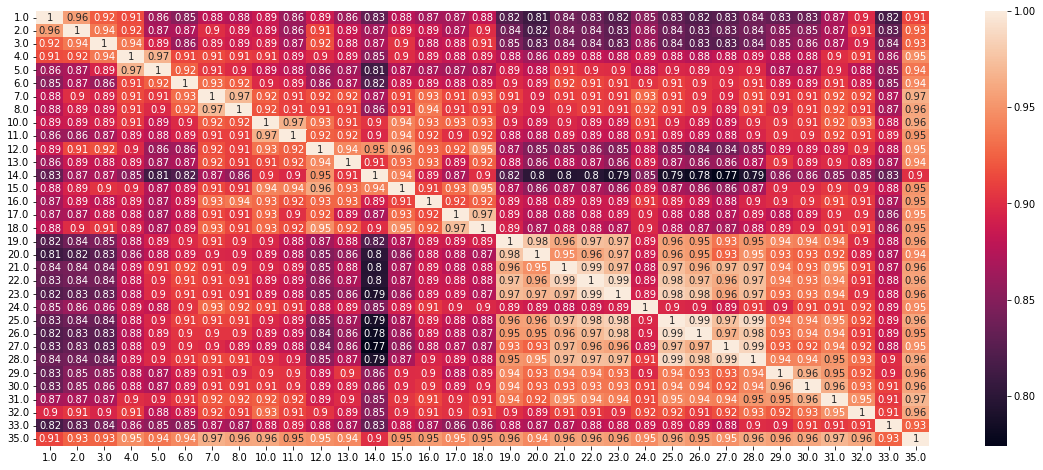

In [94]:
fig_corr, ax_corr = plt.subplots(nrows=1, ncols=1, figsize = (20,8))
sns.heatmap(ENCINAR_corr, annot=True, ax = ax_corr)
plt.show()

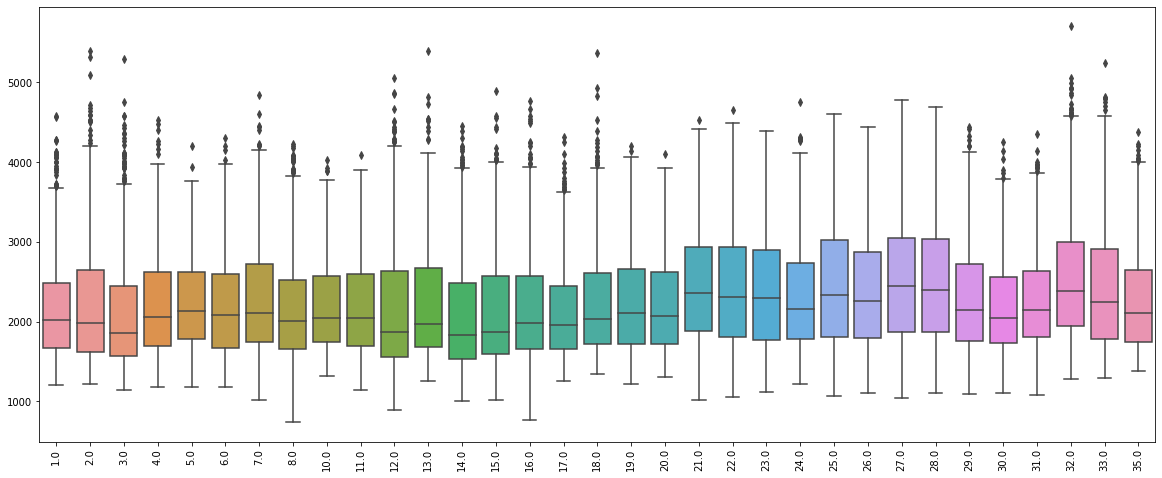

In [95]:
fig_box_E, ax_box_E = plt.subplots(nrows=1, ncols = 1, figsize= (20,8))
sns.boxplot(data = ENCINAR_df_3, ax = ax_box_E)
#plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

In [96]:
ENCINAR_df_3.index = date_time

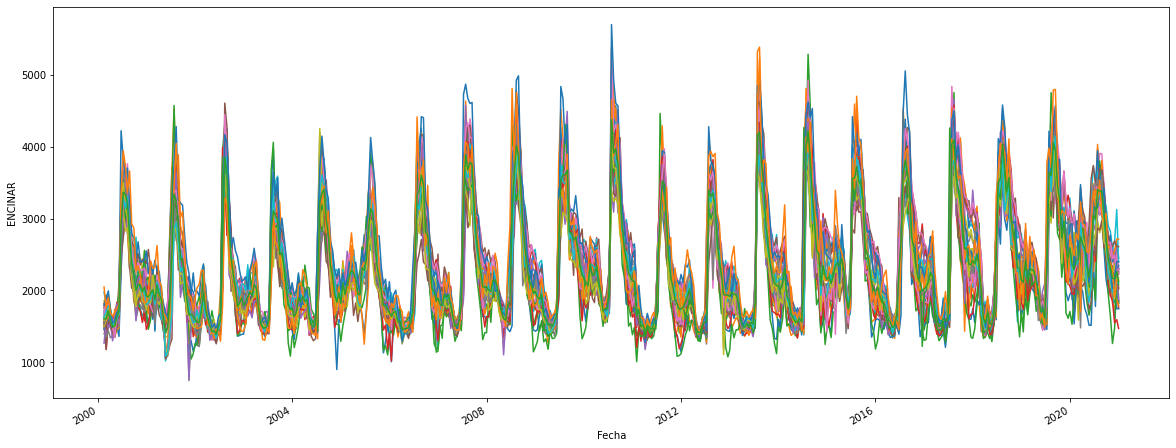

In [97]:
ax_trend = ENCINAR_df_3.plot(kind = 'line', 
                             subplots = False,
                             sharex = True,
                             figsize = (20,8),
                             legend = False)
ax_trend.set_xlabel('Fecha')
ax_trend.set_ylabel('ENCINAR')
plt.show()

### Tendencias por Clase

In [98]:
def ts_group(df_group, cat):
    list_df_group = []
    for element in cat:
        df_ = df_group.get_group(element)
        df_T = df_.iloc[:,:-1].transpose()
        df_T.rename_axis('Fecha', axis = 'index', inplace = True)
        list_df_group.append(df_T)
        
    return list_df_group
  

In [99]:
file_list

['VEGARRO.csv',
 'ENCINAR.csv',
 'MATSUB.csv',
 'MATXERO.csv',
 'MEZQUITAL.csv',
 'PASTIZAL.csv',
 'PASTINDU.csv']

In [100]:
list_groups = ts_group(data_group, CAT)

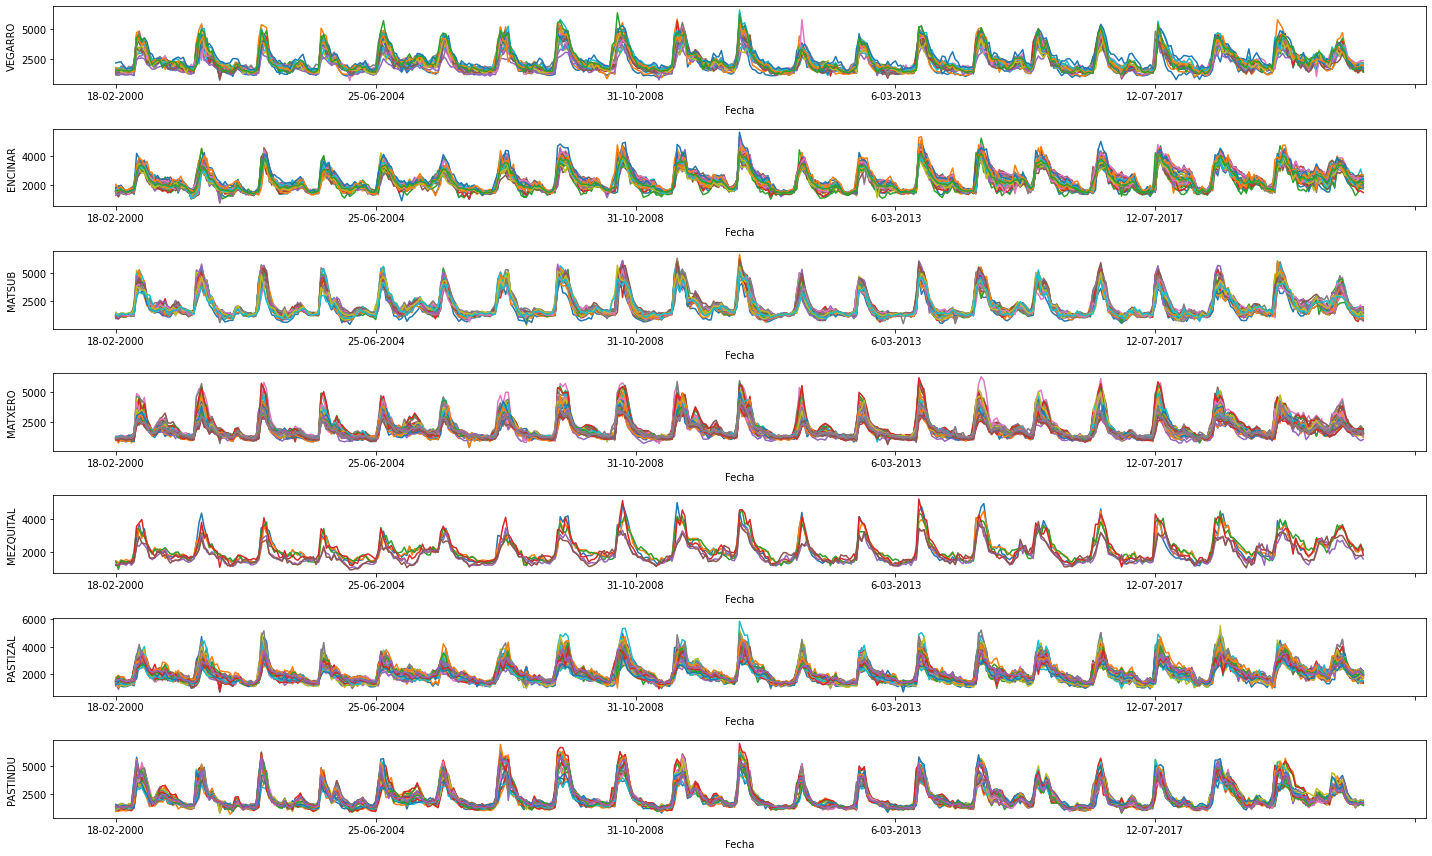

In [101]:
fig_groups, ax_groups = plt.subplots(nrows = len(CAT), ncols = 1, figsize = (20,12))
for k, df_cat in enumerate(list_groups):
    df_cat.plot(kind = 'line', 
                legend = False, 
                ax = ax_groups[k])
    ax_groups[k].set_xlabel('Fecha')
    ax_groups[k].set_ylabel(CAT[k])
plt.tight_layout()
plt.show()

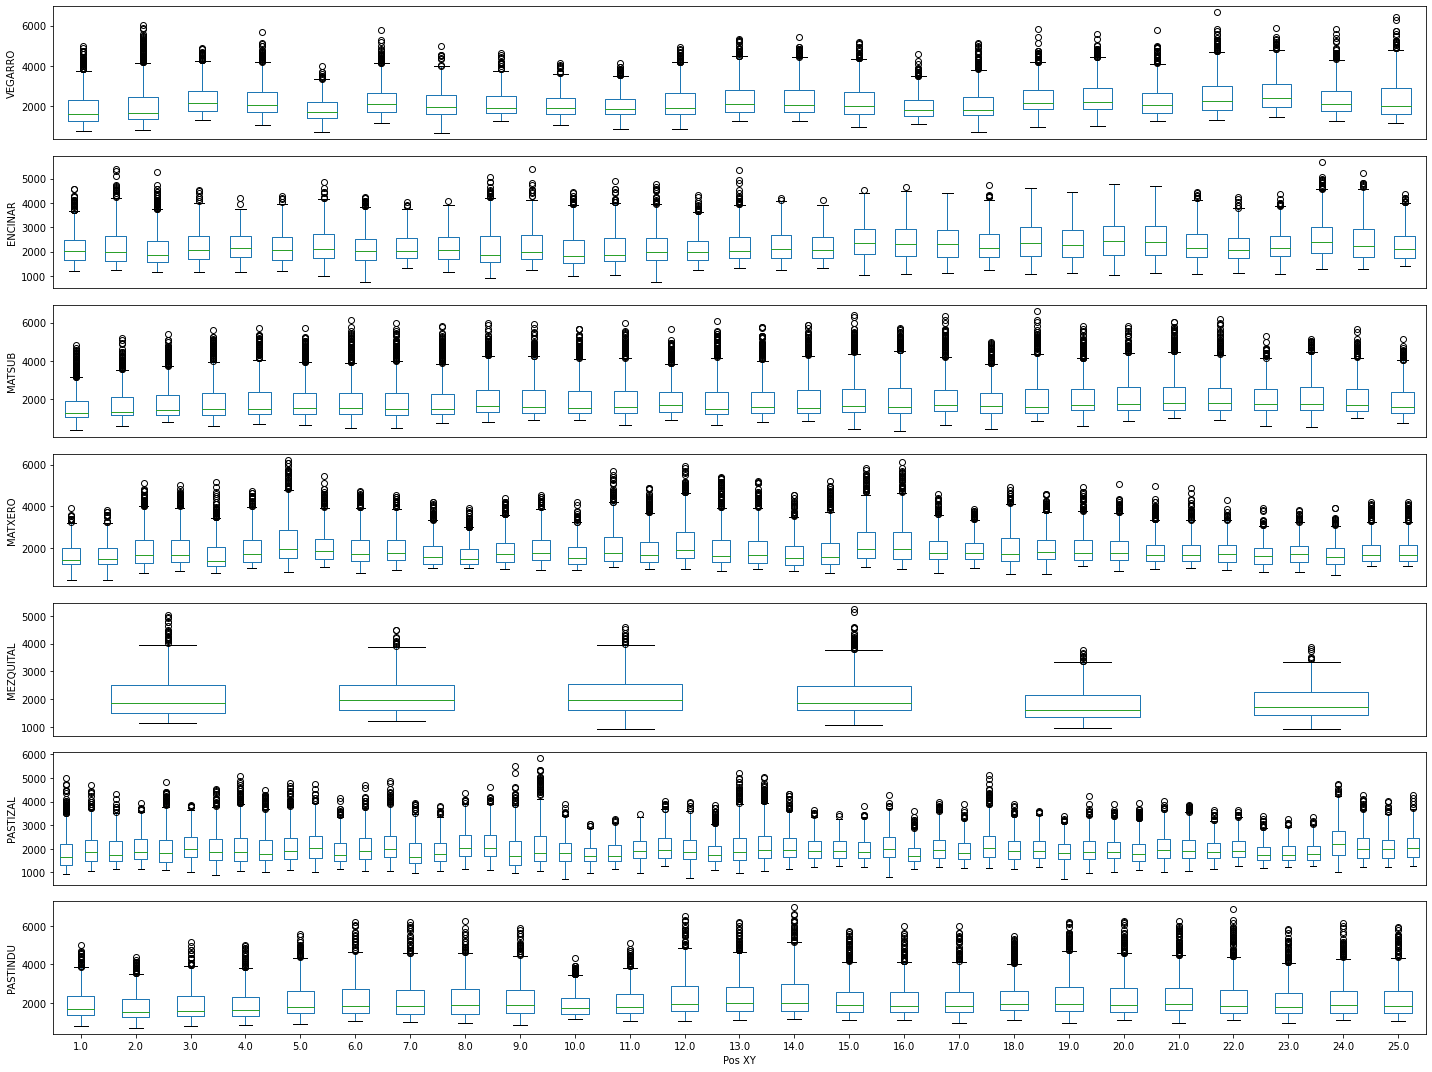

In [102]:
fig_box_groups, ax_box_groups = plt.subplots(nrows = len(CAT), ncols = 1, figsize = (20,15))
for k, df_cat in enumerate(list_groups):
    df_cat.plot(kind = 'box', 
                legend = False, 
                ax = ax_box_groups[k])
    if k == len(CAT)-1:
        ax_box_groups[k].set_xlabel('Pos XY')
    else:
        ax_box_groups[k].xaxis.set_visible(False)
    
    ax_box_groups[k].set_ylabel(CAT[k])

plt.tight_layout()
plt.show()

### TODO: Detección de Outliers